Data project:

CAPM - financial data

Choose 3 stocks
1. Data
- Import stock data from csv/api
- Merge stock data together
- Calculate expected return matrix
- Calculate covariance matrix

2. CAPM Portfolio
- Find Minimum variance portfolio and Efficient tangent portfolio (Highest sharpe ratio).
- Plot portfolios in volatility-return diagram.
- Plot efficient market frontier and capital market line

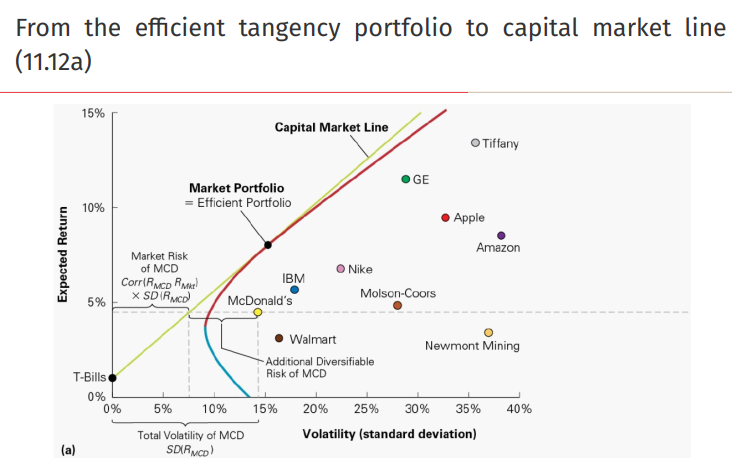

3. CAPM: Regression
- Import Fama/French market returns and risk free returns
- Clean Fama/French, fix dates
- Merge with Fama/French with returns
- Calculate market exposure/risk premium (Betas)
- Does CAPM hold? (Is alpha = 0)




In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from test_chris import *

# 1 Data

## 1.1) Importing data

In [2]:
# Importing monthly data from Yahoo Finance
data = yf.download(["^GSPC", "NVO", "MSFT"], start = "2020-01-01", end = "2024-04-08", interval = "1mo")
data = data["Adj Close"] # Only look at the adjusted close

# Calculate monthly returns
data['sp500_returns'] = data['^GSPC'].pct_change() * 100 
data["msft_returns"] = data["MSFT"].pct_change() * 100
data["nvo_returns"] = data["NVO"].pct_change() * 100
data = data.dropna() # First observation which is NA

print(data.tail())

[*********************100%%**********************]  3 of 3 completed

Ticker            MSFT         NVO        ^GSPC  sp500_returns  msft_returns  \
Date                                                                           
2023-12-01  375.345886  102.708961  4769.830078       4.422923     -0.556011   
2024-01-01  396.846130  113.918091  4845.649902       1.589571      5.728115   
2024-02-01  412.876495  118.912056  5096.270020       5.172064      4.039441   
2024-03-01  420.720001  127.480232  5254.350098       3.101878      1.899722   
2024-04-01  427.929993  125.400002  5199.060059      -1.052272      1.713727   

Ticker      nvo_returns  
Date                     
2023-12-01     1.580909  
2024-01-01    10.913487  
2024-02-01     4.383821  
2024-03-01     7.205473  
2024-04-01    -1.631806  


## 1.2 Return and covariance matrix

In [3]:
# Keep returns of Microsoft and Novo
returns = data.iloc[:, [4,5]]

# Calculate the average return over the period
return_matrix = np.mean(returns, axis = 0)
print(return_matrix)

Ticker
msft_returns    2.105357
nvo_returns     3.117391
dtype: float64


In [4]:
# Calculate covariance matrix
cov_matrix = returns.cov()
print(cov_matrix)
print("\n")

# Prints volatility
print(np.sqrt(cov_matrix))

Ticker        msft_returns  nvo_returns
Ticker                                 
msft_returns     42.661924    20.287928
nvo_returns      20.287928    36.605329


Ticker        msft_returns  nvo_returns
Ticker                                 
msft_returns      6.531610     4.504212
nvo_returns       4.504212     6.050234


# 2 Portfolios

In [5]:
def portfolio(w, return_matrix=return_matrix, cov_matrix=cov_matrix):
    '''Calculate expected returns and volatility (standard deviation) for given portfolio weights'''

    W = pd.DataFrame([w, 1-w], index=[return_matrix.index[0], return_matrix.index[1]]) # Creates weights, gives same index at return matrix
    tW = W.transpose() # Transposes weights
    var = tW.dot(cov_matrix).dot(W) # Formula for variance of portfolio
    sd = np.sqrt(var)[0][0] # take the square root
    e_r = tW.dot(return_matrix)[0] # Calculate the expected return

    return e_r, sd

## 2.1 Minimum Variance Portfolio

In [6]:
w_min = mvp_w(100, portfolio)
print(f'Minimum variance weights: w1 = {w_min:.3f}, w2 = {1 - w_min:.3f}\n')

mvp = portfolio(w_min)
print(f'MVP return = {mvp[0]:.3f}, MVP volatility = {mvp[1]:.3f}')

Minimum variance weights: w1 = 0.424, w2 = 0.576

MVP return = 2.688, MVP volatility = 5.452


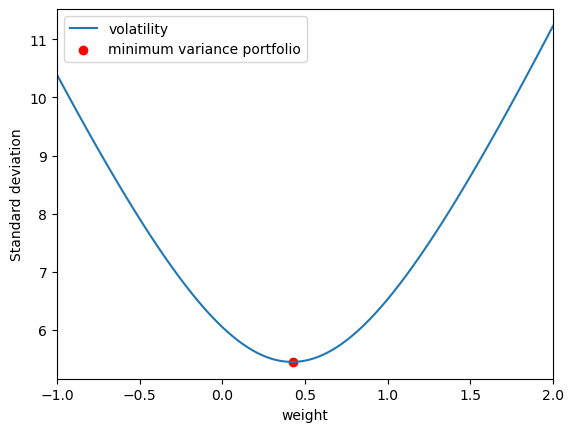

In [7]:
plot_variance(portfolio)

## 2.2 Efficient Tangent Portfolio

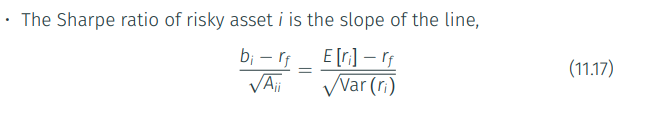

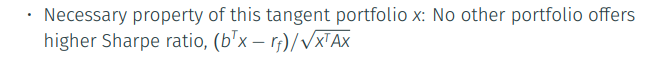

In [8]:
w_etp = etp_w(100, portfolio)
print(f'Efficient tangent portfolio weights: w1 = {w_etp:.3f}, w2 = {1 - w_etp:.3f}\n')

etp = portfolio(w_etp)
print(f'ETP return = {etp[0]:.3f}, ETP volatility = {etp[1]:.3f}')

Efficient tangent portfolio weights: w1 = 0.121, w2 = 0.879

ETP return = 2.995, ETP volatility = 5.764


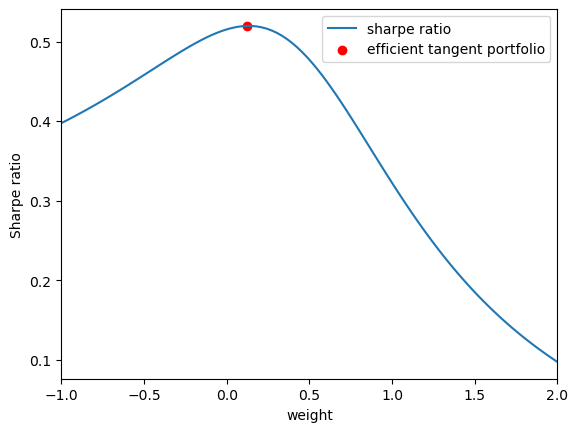

In [9]:
plot_sharp(portfolio)

## 2.3 Efficient market frontier

In [10]:
# Weights for the MVP and ETP
mvp_weights = pd.DataFrame([w_min, 1 - w_min])
etp_weights = pd.DataFrame([w_etp, 1 - w_etp])

# Creating y_vec and lin_vec to store linear combinations
y_vec = np.linspace(-3, 3, 100)
lin_vec = []

for y in y_vec:
    linear = y*mvp_weights + (1-y)*etp_weights
    lin_vec.append(linear[0][0])

In [21]:
lin_vec

100

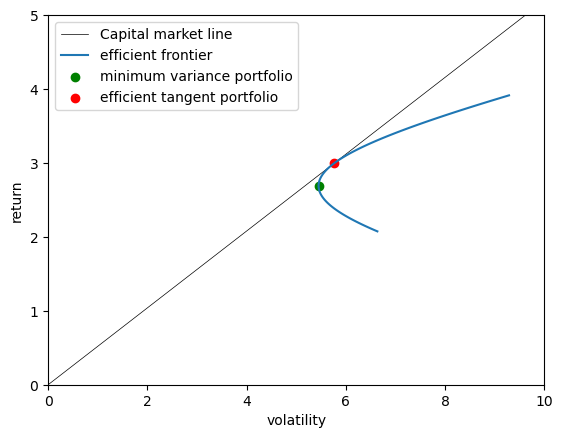

In [11]:
plot_capm(mvp, etp, lin_vec, portfolio)

# 3 Market regression

## 3.1 Beregn CAPM prædiktion

- Indhent datasæt Fama-French.xlsx
- Merge returns fra yahoo og Fama-French datasæt på datoerne
- Beregn "stock_return" - rf 
- Regresser r - rf = Mkt - rf

Hvor stor er beta, har de mere eller mindre risiko end markedet?

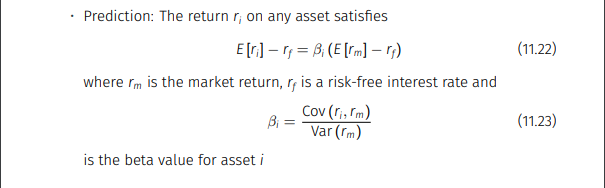

In [12]:
df = pd.read_excel('Fama-French.xlsx') # Datasæt med returns for markedsporteføljen og risk free bonds
df.columns = ['Date'] + list(df.columns[1:])
df.set_index("Date", inplace=True)
print(df.tail())

        Mkt-RF    RF
Date                
202310   -3.19  0.47
202311    8.84  0.44
202312    4.87  0.43
202401    0.71  0.47
202402    5.06  0.42
